<a href="https://colab.research.google.com/github/piratesdragon/project_statistics/blob/main/final_project_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорты
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, shapiro
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
# Данные
data = pd.read_csv(r"https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv",sep=';')
data = data[['density','pH', 'sulphates', 'alcohol', 'quality']]

In [3]:
data.head(5)

,density,pH,sulphates,alcohol,quality
0,1.0010,3.00,0.45,8.8,6
1,0.9940,3.30,0.49,9.5,6
2,0.9951,3.26,0.44,10.1,6
3,0.9956,3.19,0.40,9.9,6
4,0.9956,3.19,0.40,9.9,6


В качестве данных я взяла тренирвоочный датасет, в котором приведены данные о качестве белого vinho verde. Для дальнейшего анализа я оставила следующие колонки:
- density
- pH
- sulphates
- alcohol

Все - количественные непрерывные переменные.
- quality - количественная переменная, принимает значения от 0 до 10.


### EDA

In [4]:
# Проверим наличие пустых значений

data.isna().any()

density      False
pH           False
sulphates    False
alcohol      False
quality      False
dtype: bool

In [5]:
print(data.describe())

           density           pH    sulphates      alcohol      quality
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000
mean      0.994027     3.188267     0.489847    10.514267     5.877909
std       0.002991     0.151001     0.114126     1.230621     0.885639
min       0.987110     2.720000     0.220000     8.000000     3.000000
25%       0.991723     3.090000     0.410000     9.500000     5.000000
50%       0.993740     3.180000     0.470000    10.400000     6.000000
75%       0.996100     3.280000     0.550000    11.400000     6.000000
max       1.038980     3.820000     1.080000    14.200000     9.000000


Плотность (density): Среднее значение плотности вина составляет примерно 0.994, со стандартным отклонением около 0.003. Значения плотности варьируются от примерно 0.987 до 1.039, при этом 75% данных имеют плотность ниже 0.996.

Уровень pH (pH): Средний уровень pH вина составляет примерно 3.188, со стандартным отклонением около 0.151. Значения pH варьируются от примерно 2.72 до 3.82.

Содержание сульфатов (sulphates): Среднее содержание сульфатов составляет около 0.49, со стандартным отклонением примерно 0.11. Значения содержания сульфатов варьируются от примерно 0.22 до 1.08.

Содержание алкоголя (alcohol): Среднее содержание алкоголя в вине составляет примерно 10.51, со стандартным отклонением около 1.23. Значения содержания алкоголя варьируются от примерно 8 до 14.2.

Качество вина (quality): Значения качества вина варьируются от 3 до 9, причем среднее качество составляет примерно 5.88. Большинство вин имеют качество на уровне 5 или 6.

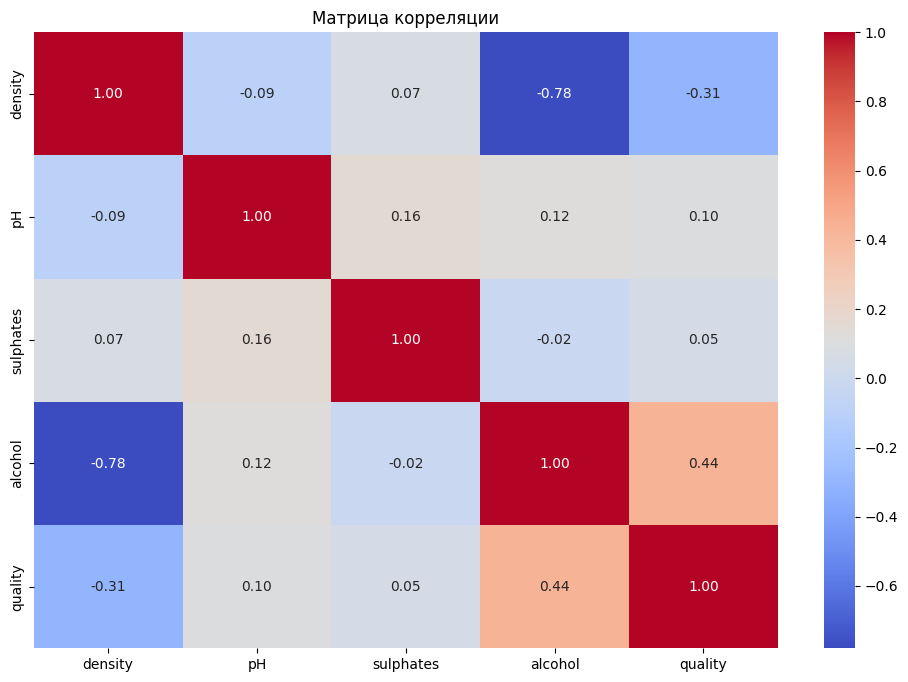

In [6]:
# Корреляционная матрица

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Матрица корреляции')
plt.show()

Density (плотность) и Alcohol (алкоголь): Сильно отрицательная корреляция между плотностью и содержанием алкоголя (-0.78) указывает на то, что более высокое содержание алкоголя связано с более низкой плотностью вина.

pH и другие переменные: Переменная pH имеет слабую положительную корреляцию с переменными sulphates и quality, что может указывать на некоторую взаимосвязь между pH вина, содержанием сульфатов и его качеством.

Quality (качество) и другие переменные: Переменная качества имеет относительно слабую корреляцию с остальными переменными. Однако существует некоторая положительная корреляция с содержанием алкоголя, что может указывать на то, что более высокое содержание алкоголя связано с более высоким качеством вина.

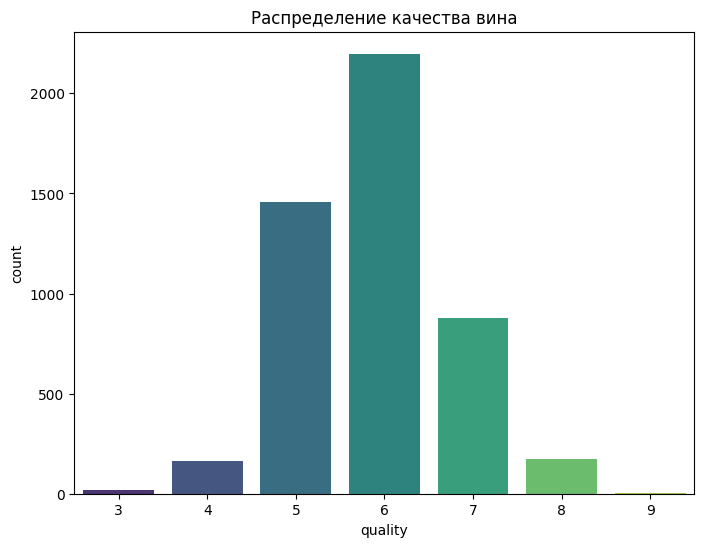

In [7]:
# Распределение качества вина

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Распределение качества вина')
plt.show()

По гистограмме видно, что распределение данных о качестве вина не нормальное. В качестве подтверждения проведем тест Шапиро на нормальность распределения.

**Нулевая гипотеза (H0)**: данные распределены нормально.

**Альтернативная гипотеза (H1)**: распределение данных отличается от нормального.

In [8]:
stat, p = shapiro(data['quality'])

if p > 0.05:
    print('Выборка качества вина выглядит как нормальное распределение (не отвергается H0)')
else:
    print('Выборка качества вина не выглядит как нормальное распределение (отвергается H0)')

Выборка качества вина не выглядит как нормальное распределение (отвергается H0)


Посмотрим аналогично про содержание алкоголя.

Нулевая гипотеза (H0): данные о содержании алкоголя распределены нормально.

Альтернативная гипотеза (H1): распределение данных отличается от нормального.

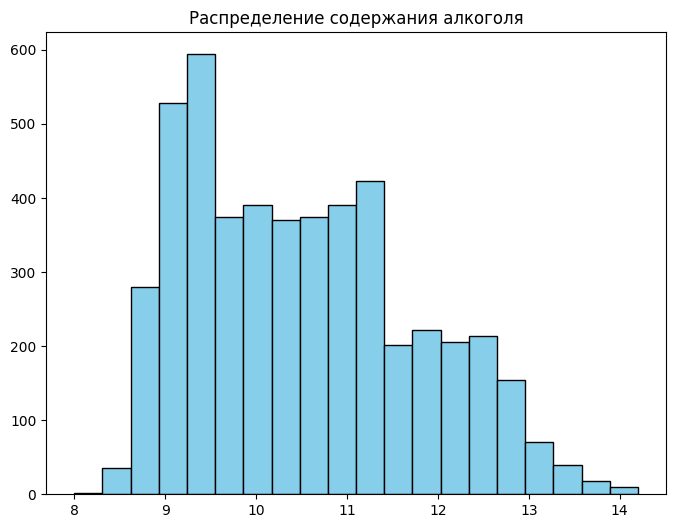

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(data['alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение содержания алкоголя')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Частота')
plt.show()

In [57]:
stat, p = shapiro(data['quality'])

if p > 0.05:
    print('Выборка содержания алкоголя выглядит как нормальное распределение (не отвергается H0)')
else:
    print('Выборка содержания алкоголя не выглядит как нормальное распределение (отвергается H0)')

Выборка качества вина не выглядит как нормальное распределение (отвергается H0)


### Статистический анализ

По матрице корреляции было видно наличие положительной корреляции между содержанием алкоголя и качеством вина. Проверим это с помощью статистических критериев.

**Нулевая гипотеза (H0)**: Содержание алкоголя не имеет значимого влияния на качество вина.

**Альтернативная гипотеза (H1)**: Содержание алкоголя имеет значимое влияние на качество вина.

Так как переменные имеют не нормальное распределение, для проверки нулевой гипотезы я воспользуюсь **тестами Кендалла и Спирмена**, потому что они являются непараметрическими тестами и не требуют предположения о распределении данных. В отличие от параметрических тестов, которые предполагают нормальность данных, непараметрические тесты оценивают степень связи между переменными на основе их рангов или порядков, а не самих значений.

In [10]:
from scipy.stats import kendalltau, spearmanr

In [11]:
# Проведение теста Кендалла
kendall_corr, kendall_p_value = kendalltau(data['quality'], data['alcohol'])

alpha = 0.05
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")
print(f"P-значение Кендалла: {kendall_p_value}")
if kendall_p_value > alpha:
    print("Нет статистически значимой корреляции по тесту Кендалла.")
else:
    print("Есть статистически значимая корреляция по тесту Кендалла.")

Коэффициент корреляции Кендалла: 0.3466721462937728
P-значение Кендалла: 2.756278659077962e-218
Есть статистически значимая корреляция по тесту Кендалла.


In [12]:
# Проведение теста Спирмена
spearman_corr, spearman_p_value = spearmanr(data['quality'], data['alcohol'])

alpha = 0.05
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")
print(f"P-значение Спирмена: {spearman_p_value}")
if spearman_p_value > alpha:
    print("Нет статистически значимой корреляции по тесту Спирмена.")
else:
    print("Есть статистически значимая корреляция по тесту Спирмена.")

Коэффициент корреляции Спирмена: 0.440369181624683
P-значение Спирмена: 1.6591955335862925e-231
Есть статистически значимая корреляция по тесту Спирмена.


Оба теста подтверждают наличие статистически значимой корреляции, то есть мы можем отклонить нулевую гипотезу об отсутствии взаимосвязи между переменными.

### Кластерный анализ

Попробуем посмотреть, можно ли кластеризовать наши данные. Для этого используем алгоритм K-means.

Я выбрала два параметра для кластеризации, чтобы можно было более наглядно посмотреть на результаты кластеризации на графике.

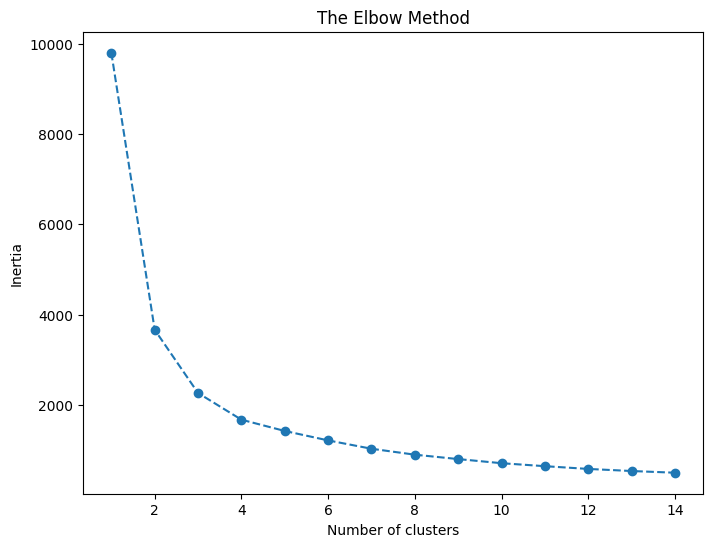

In [24]:
X = data[['density', 'alcohol']]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Подбор оптимального числа кластеров с помощью метода локтя
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()


По графику локтя видно, что самое значительное уменьшение инерции происходит при числе кластеров = 3. При делении данных на большее число кластеров инерция продолжает уменьшаться, но это уменьшение уже не настолько значительно. Слишком большое число кластеров также грозит потерей информативности, поэтому остановимся на нем.

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters

print(data.head(15))

    density    pH  sulphates  alcohol  quality  Cluster
0    1.0010  3.00       0.45      8.8        6        1
1    0.9940  3.30       0.49      9.5        6        0
2    0.9951  3.26       0.44     10.1        6        0
3    0.9956  3.19       0.40      9.9        6        0
4    0.9956  3.19       0.40      9.9        6        0
5    0.9951  3.26       0.44     10.1        6        0
6    0.9949  3.18       0.47      9.6        6        0
7    1.0010  3.00       0.45      8.8        6        1
8    0.9940  3.30       0.49      9.5        6        0
9    0.9938  3.22       0.45     11.0        6        0
10   0.9908  2.99       0.56     12.0        5        2
11   0.9947  3.14       0.53      9.7        5        0
12   0.9920  3.18       0.63     10.8        5        0
13   0.9912  3.54       0.52     12.4        7        2
14   1.0002  2.98       0.67      9.7        5        1


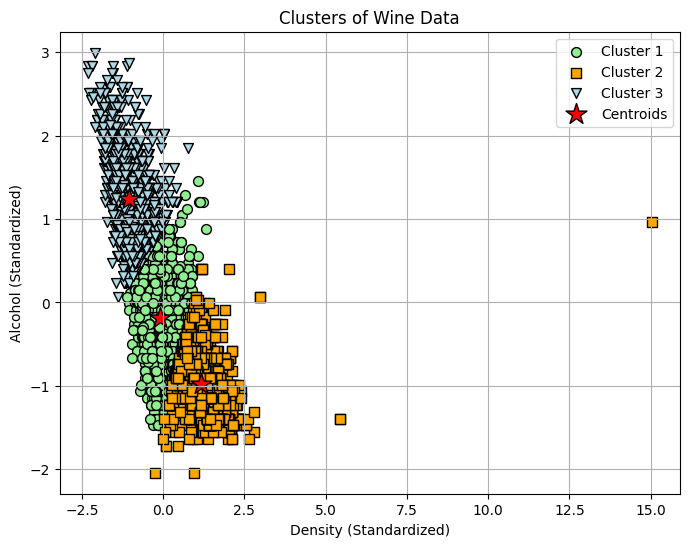

In [27]:
# Построение scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=50, c='lightgreen', marker='o', edgecolor='black', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=50, c='orange', marker='s', edgecolor='black', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

# Визуальные настройки
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Density (Standardized)')
plt.ylabel('Alcohol (Standardized)')
plt.title('Clusters of Wine Data')
plt.show()


### Логистическая регрессия

Применим логистическую регрессию чтобы проверить, можно ли по имеющимся данным предсказать качество (целевая переменная quality).

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


X = data[['density', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

regressor = LogisticRegression(max_iter=3000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Accuracy Score:', accuracy_score(y_test,y_pred))


Mean Squared Error: 0.8571428571428571
Accuracy Score: 0.47244897959183674


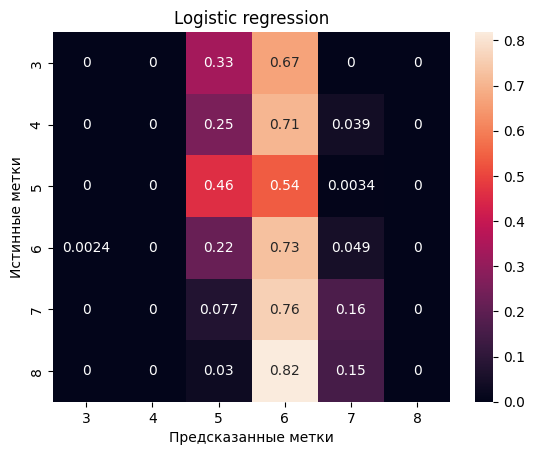

In [52]:
cm_1 = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_1, annot=True, xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title(f'Logistic regression')
plt.show()

По матрице ошибок видно, что в основном модель просто предсказывает оценки 5 и 6 - самые частотные, как можно было видеть по графику распределения. Для более точных результатов стоит нормализовать данные. Кроме того, для удобства работы над датасетом в рамках проекта я использовала ограниченное число переменных. Возможно, использование большего числа перменных также приведет к улучшению качества предсказания оценки.